# Simple Linear Regression model for Salary dataset

YearsExperience-empolyee experience which will give in years from

Salary-empolyee Salary which depend on Years of Experience


In [1]:
import sklearn
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split#create of training and testing set
from sklearn.linear_model import LinearRegression#model
import numpy as np
import matplotlib.pyplot as plt

# import dataset

In [2]:
df=pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# check the data information

In [3]:
df.shape

(30, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


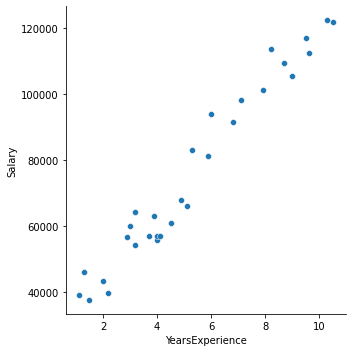

In [5]:
sns.relplot(x="YearsExperience",y="Salary",data=df)

 # Calculate correlation

In [6]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\Admin\anaconda3\envs\py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

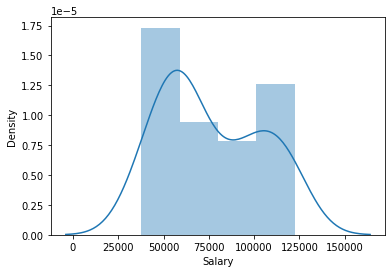

In [7]:
sns.distplot(df["Salary"])

 Both dependent and independent variables shows the linear relationship with positive correlation and with no outliers 

# Divide the data into Dependent and Independent variable

In [8]:
y=df["Salary"]#Deapendent variable -salary
x=df["YearsExperience"]#independent variable-YearsExperience

In [9]:
x.shape#check the size of Deapendent variable

(30,)

In [10]:
y.shape#check the size of independent variable

(30,)

# Reshaping the independent Variable 

The Library required 2D Value for processing but the independent Variable is 1D so Covert the 1D variable into 2D Variable

In [11]:
x_matrix=x.values.reshape(-1,1)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x_matrix,y,test_size=0.25)#,random_state=101

In [13]:
#x_train

In [14]:
#y_train

In [15]:
#x_test

In [16]:
#y_test

# Bulid the LinearRegression Model

In [17]:
reg=LinearRegression()#model

In [18]:
reg.fit(x_train,y_train)# best m and c value 

LinearRegression()

# Value of Slope [m]

In [19]:
reg.coef_#slope /m value

array([9206.27646259])

# Value of intercept [c]

In [20]:
reg.intercept_#y intercept/c

27121.731351843824

# Prediction of model

In [21]:
predy=reg.predict(x_test)

In [22]:
predy

array([ 45534.28427703,  61184.95426344, 115501.98539274,  64867.46484848,
        40931.14604573,  75914.99660359, 121946.37891655, 102613.19834511])

In [23]:
x_test

array([[ 2. ],
       [ 3.7],
       [ 9.6],
       [ 4.1],
       [ 1.5],
       [ 5.3],
       [10.3],
       [ 8.2]])

In [24]:
reg.predict(np.array(170).reshape(-1,1))

array([1592188.72999268])

In [25]:
reg.score(x_train,y_train)

0.9502035167663092

In [26]:
reg.score(x_test,y_test)

0.9661483271860576

# Scatter plot for Predicted all value 

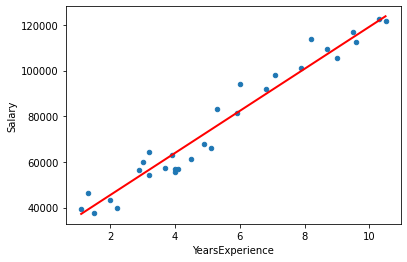

In [27]:
allpred=reg.predict(x_matrix)#predicted for all value
df.plot(kind="scatter",x="YearsExperience",y="Salary")#scatter plot
plt.plot(x,allpred,c="red",linewidth=2)#drawing the bestfitline

here we can see the bestfitline for all predicted value

In [28]:
predy=reg.predict(x_test)
train_predy=reg.predict(x_train)

# Compute the MSE

In [29]:
from sklearn.metrics import mean_squared_error
#mse for training dataset
mse=mean_squared_error(y_train,train_predy)
mse

30721664.956061736

# Value of RMSE

In [30]:
from math import sqrt
rmse=sqrt(mse)
rmse

5542.712779502627

# MSE & RMSE for testing dataset

In [31]:
#mse for testing dataset
mse=mean_squared_error(y_test,predy)
mse

34519659.08907086

In [32]:
rmse=sqrt(mse)
rmse

5875.343316698256

In [33]:
reg.score(x_train,y_train)

0.9502035167663092

In [34]:
reg.score(x_test,y_test)

0.9661483271860576

# Accuracy of Testing & Training 

In [35]:
#testing Accuracy
from sklearn.metrics import r2_score
r_squared=r2_score(y_test, predy)
r_squared

0.9661483271860576

Accuracy of the testing data is 96.61%

In [37]:
#training Accuracy
from sklearn.metrics import r2_score
r_squared=r2_score(y_train, train_predy)
r_squared

0.9502035167663092

Accuracy of the training data is 95.02% 